# Common

## Imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn import metrics
from sklearn.metrics import silhouette_score as sil_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.metrics import plot_confusion_matrix, classification_report



%matplotlib inline

## Functions

In [40]:
def calculate_null_accuracy(y):
    vals, counts = np.unique(y, return_counts=True)
    
    norm = counts / np.sum(counts)
    
    return max(norm)

def print_line(title=None):
    print(80*'-')
    if title:
        print('* ', title, ' *')
        print(80*'-')
    

# Datasets

## Wine Quality

Null Accuracy: 53.47 %


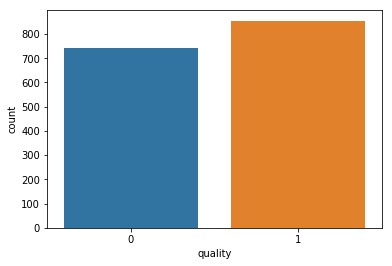

In [3]:
wine = pd.read_csv('datasets/wine-quality/winequality-red.csv', sep=';')
# Preprocess the data
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

# separate the dataset as response variable and feature variables
wineX = wine.drop('quality', axis=1)
winey = wine['quality']
wine_labels = ['bad wine', 'good wine']
wineX_scaled = scale(wineX)

# look at distribution
wine_null = calculate_null_accuracy(winey)
print("Null Accuracy: %.2f %%" % (wine_null*100))

sns.countplot(wine['quality'])

## Digits

Null Accuracy: 10.18 %


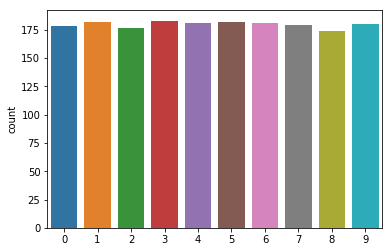

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

digitsX = digits.data
digitsy = digits.target
digits_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
digitsX_scaled = scale(digitsX)

# look at distribution
digits_null = calculate_null_accuracy(digitsy)
print("Null Accuracy: %.2f %%" % (digits_null*100))

sns.countplot(digitsy)

## Test & Training Sets

In [5]:
'''
X = wineX
y = winey
labels = wine_labels
'''
X = digitsX
y = digitsy
labels = digits_labels
data = scale(X)

testSize = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=0)

numSamples, numFeatures = X.shape
numClusters = len(np.unique(y))
print("Number of samples: %d\nNumber of features: %d\nClusters: %d" %(numSamples, numFeatures, numClusters))


Number of samples: 1797
Number of features: 64
Clusters: 10


## Report Notes
Reading in data and scaling all feature values. 

### Wine
- Samples = 1599
- Features = 11
- Null Accuracy = 53.47%

### Digits
- Samples = 1797
- Features = 64
- Null Accuray = 10.18%

# Cluster
Choose your own measure of distance similarity

distance used: defaulting to euclidean, EXPLAIN

## Helper Functions



In [6]:
# kmeans plot showing elbow method and silhouette score
def kmeans_plot(dataName, data):
    sse = []
    scores = []
    for i in range(2,15):
        kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        
        kmeans_labels = kmeans.predict(data)
        scores.append(sil_score(data, kmeans_labels))
                
    # Plot the data
    title = "K-means of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(211)
    plt.plot(range(2,15),sse, 'x-')
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.grid()
    
    plt.subplot(212)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()
            
            
# expectation maximization plot showing bic and silhouette score
def em_plot(dataName, data):
    aic = []
    bic = []
    scores = []
    for i in range(2,15):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(data)
        aic.append(gmm.aic(data))
        bic.append(gmm.bic(data))
        
        gmm_labels = gmm.predict(data)
        scores.append(sil_score(data, gmm_labels))
                
    # Plot the data
    title = "Expectation Maximization of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(311)
    plt.plot(range(2,15), aic, 'x-')
    plt.title("AIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('AIC')
    plt.grid()
    
    plt.subplot(312)
    plt.plot(range(2,15), bic, 'x-')
    plt.title("BIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('BIC')
    plt.grid()
    
    plt.subplot(313)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()

#kmeans_plot('Wine Quality', wineX)
#em_plot('Wine Quality', wineX)

## K-means
How did you choose k?
- Kmeans
    - Inertia: 
        - "is defined as the mean squared distance between each instance and its closest centroid. Logically, as per the definition lower the inertia better the model". 
        - "Sum of squared distances of samples to their closest cluster center" as defined by scikit learn
    - Silhouette Score: 
    
        Silhouette Coefficient = (x-y)/ max(x,y)
    
        where, y is the mean intra cluster distance: mean distance to the other instances in the same cluster. x depicts mean nearest cluster distance i.e. mean distance to the instances of the next closest cluster. The coefficient varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster.

    https://medium.com/@jyotiyadav99111/selecting-optimal-number-of-clusters-in-kmeans-algorithm-silhouette-score-c0d9ebb11308
    
- Expectation Maximization
    - AIC - Akaike information criterion - the lower the better
        The Akaike information criterion (AIC) is an estimator of out-of-sample prediction error and thereby relative quality of statistical models for a given set of data.[1][2] Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.
        
        AIC is founded on information theory. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.
        
        In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.
        
        - Wikipedia
        
    - BIC - Bayesian information criterion - the lower the better
    
        In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).
        
        When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.
        
        - Wikipedia

### Wine

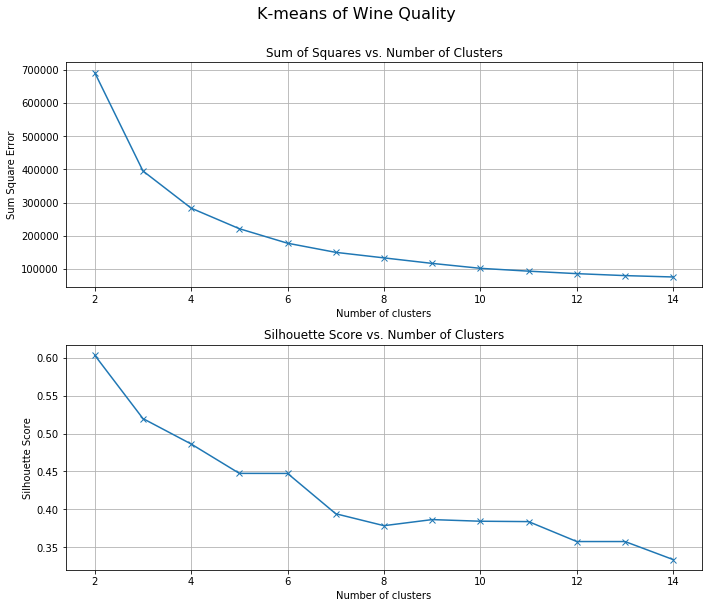

In [7]:
kmeans_plot('Wine Quality', wineX)

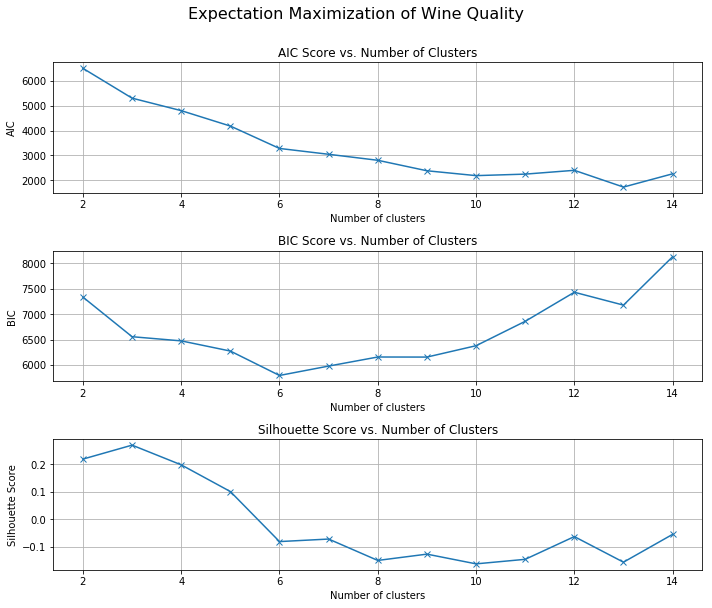

In [8]:
em_plot('Wine Quality', wineX)

### Digits

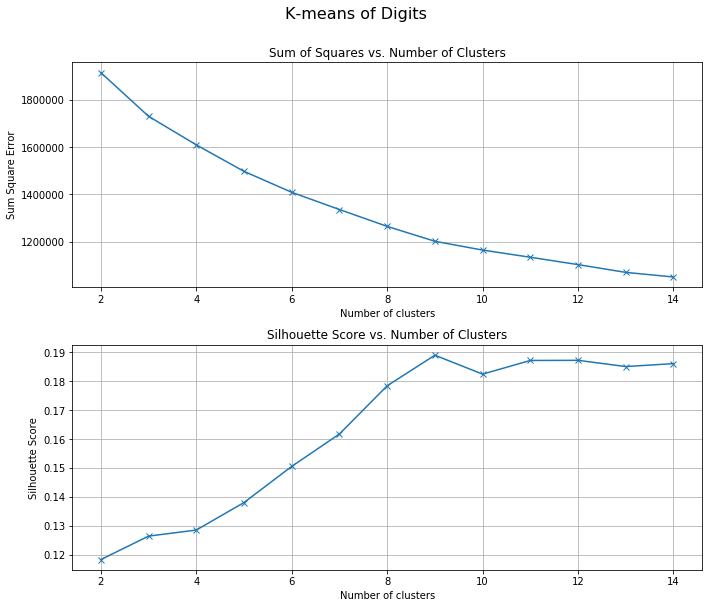

In [9]:
kmeans_plot('Digits', digitsX)

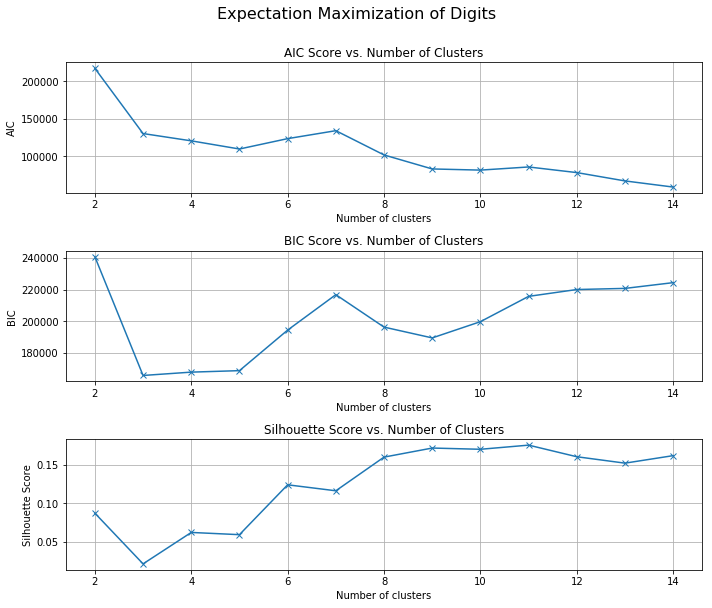

In [10]:
em_plot('Digits', digitsX)

## Report Notes
### k-means
Elbow Method
"We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value." The optimal value for k is then chosen based on where the "elbow" in the chart is, where the WCSS value may continue decreasing, but not at any quick rate.


#### Wine
- Clusters = 2
- Elbow Method at k=3 or 4
- Silhouette Score at 2

#### Digits
- Clusters = 10
- Elbow 9 or 10
- Score at 9


### Expectation Maximization

#### Wine
- Low AIC > 8
- Low BIC around 6
- Score the best around 2 or 3

#### Digits
- Low AIC between 8 to 14
- Low BIC trough between 3 and 5, and again at 8-10
- Best score around 9-11


# Dimensionality Reduction

## Helper Functions

In [11]:
# Dimensionality reduction imports
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection as RP
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.linalg import pinv
from scipy.stats import kurtosis
from scipy import sparse 


# borrowed from https://github.com/JonathanTay/CS-7641-assignment-3/
def reconstruction_error(algo, data):
    W = algo.components_
    if sparse.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed = ((p @ W) @ (data.T)).T
    errors = np.square(data - reconstructed)
    return np.nanmean(errors)

#
# PCA
#

def calc_pca_components(data, dataName):
    t0 = time()
    
    pca = PCA(n_components=data.shape[1], random_state=0)
    pca.fit(data)
    var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
    
    end = time() - t0
    
    plt.title('PCA Analysis for %s' % dataName)
    plt.ylabel('Cumulative % Variance')
    plt.xlabel('Number of Features')
    plt.axhline(y=95, color='gray', linestyle='--', label='95% Variance')
    plt.plot(range(1,data.shape[1]+1), var)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    numComponents = np.argmax(var>95) + 1
    
    
    print('%s total features: %d' %(dataName, data.shape[1]))
    print('Best Number of PCA Components: %d' % numComponents)
    print('Total Time: %.3f seconds' % end)
    
    
#
# ICA
#
def calc_ica_components(data, dataName):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    for dim in range(2,dimensions):
        ica = FastICA(n_components=dim, max_iter=600, random_state=0)
        res = ica.fit_transform(data)
        tmp = pd.DataFrame(res)
        k   = tmp.kurt(axis=0)
        kurtosis.append(k.abs().mean())
        
    end = time() - t0
    
    optimalComponents = np.argmax(kurtosis)
    
    plt.title('ICA Analysis for %s' % dataName)
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of ICA Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# RP
#
def calc_rp_components(data, dataName, tries=100):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    stddev_kurtosis = []
    lowerbound = []
    upperbound = []
    for dim in range(2,dimensions):
        kurts = []
        for t in range(tries):
            rp = RP(n_components=dim)
            res = rp.fit_transform(data)
            tmp = pd.DataFrame(res)
            k   = tmp.kurt(axis=0)
            kurts.append(k.abs().mean())
        kurtosis.append(np.mean(kurts))
        lowerbound.append(np.mean(kurts)-np.std(kurts))
        upperbound.append(np.mean(kurts)+np.std(kurts))
        
    optimalComponents = np.argmax(kurtosis)
    
    end = time() - t0
    
    plt.title('RP Analysis for %s: %d Iterations' % (dataName, tries))
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.fill_between(range(2, dimensions), lowerbound, upperbound, facecolor='gray', alpha=0.1)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of RP Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# UFS
#
# function based on https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py
def calc_kbest(dataX, datay, dataName):
    t0 = time()
    
    kBest = SelectKBest(f_classif, k=4)
    kBest.fit(dataX, datay)
    scores = kBest.pvalues_
    scores[np.isnan(scores)]=0 # get rid of NaN's
    scores += 1e-308           # get rid of zero values
    scores = -np.log10(scores)
    scores /= scores.max()
    
    plt.title('UFS Analysis for %s' % dataName)
    plt.ylabel('Normalized Univariate Score')
    plt.xlabel('Feature Number')
    plt.bar(np.arange(dataX.shape[-1]),scores)
    plt.grid(alpha=0.3)
    plt.show()

    end = time() - t0
    print('Total Time: %.3f seconds' % end)


#calc_pca_components(wineX_scaled, 'Wine Quality')
#calc_ica_components(wineX_scaled, 'Wine Quality')
#calc_rp_components(wineX_scaled, 'Wine Quality')
#calc_kbest(wineX_scaled, winey, 'Wine Quality')


#calc_pca_components(digitsX_scaled, 'Digits')
#calc_ica_components(digitsX_scaled, 'Digits')
#calc_rp_components(digitsX_scaled, 'Digits')
#calc_kbest(digitsX_scaled, digitsy, 'Digits')

## Wine

### PCA
- What is the distribution of eigenvalues?
    - Cumulative sum of variance was used to decide the best number of features. The cap was set at 95% variance of the dataset, after which implementing additional features could be thought of as having marginal return
- Assuming you only generate k projections (i.e. you do dimensionality reduction, how well is the data reconstructed?

### ICA
- How kurtotic are the distributions
    - More kurtotic, the better, so we find the max kurtosis from 1->num features. Large positive kurtosis means a "point" distribution, or a "supergaussian"
    - "Maximizing independence between components is closely related to maximizing their non-Gaussianity (again, see Hyvarinen and Oja). In principle, this can be achieved by maximizing the absolute or squared kurtosis, which is one way to measure non-Gaussianity. But, estimating kurtosis is highly sensitive to outliers, so this doesn't provide a good objective function for ICA in practice." - some person of stackexchange.com
- Do the projection axes seem "meaningful"?

### Randomized Projections
- Assuming you only generate k projections (i.e. you do dimensionality reduction) how well is the data reconstructed?
    - Data reconstruction was MUCH worse than PCA and ICA
- How much variation did you get when you re-ran several times?
    - A lot of variation. The number of components used averages out and the standard deviation of the kurtosis becomes smaller and smaller with an increase in iterations and number of components

### Univariate Feature Selection
- something

--------------------------------------------------------------------------------
*  Wine PCA  *
--------------------------------------------------------------------------------


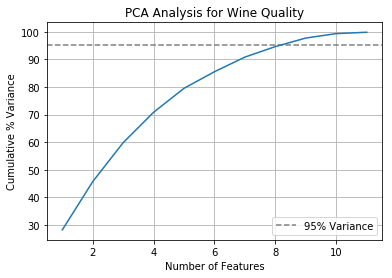

Wine Quality total features: 11
Best Number of PCA Components: 9
Total Time: 0.002 seconds
PCA Reconstruction Error:  5.296722553830842e-31
--------------------------------------------------------------------------------
*  Wine ICA  *
--------------------------------------------------------------------------------


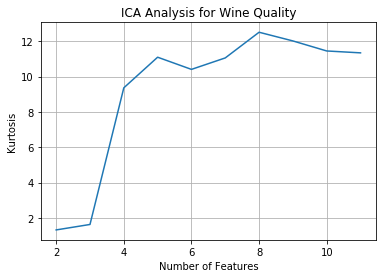

Total Number of Features: 11
Best Number of ICA Components: 8
Total Time: 0.060 seconds
ICA Reconstruction Error:  0.14475286492356385
--------------------------------------------------------------------------------
*  Wine RP  *
--------------------------------------------------------------------------------


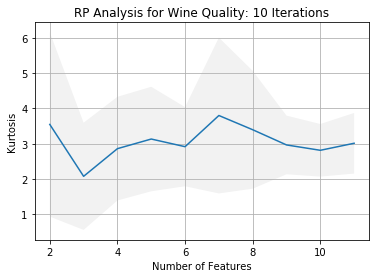

Total Number of Features: 11
Best Number of RP Components: 7
Total Time: 0.073 seconds


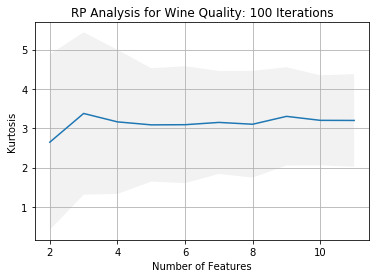

Total Number of Features: 11
Best Number of RP Components: 3
Total Time: 0.729 seconds
ICA Reconstruction Error:  0.8792678251948076
--------------------------------------------------------------------------------
*  Wine UFS  *
--------------------------------------------------------------------------------


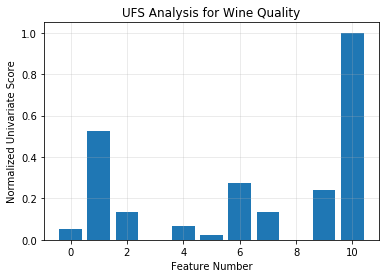

Total Time: 0.180 seconds


In [13]:
#
# PCA
#
print_line('Wine PCA')
wine_pca_components = calc_pca_components(wineX_scaled, 'Wine Quality')
winePCA = PCA(n_components=wine_pca_components, random_state=0).fit(wineX_scaled)
wine_pca_sse = reconstruction_error(winePCA, wineX_scaled)
print('PCA Reconstruction Error: ', wine_pca_sse)



#
# ICA
#
print_line('Wine ICA')
wine_ica_components = calc_ica_components(wineX_scaled, 'Wine Quality')
wineICA = FastICA(n_components=wine_ica_components, random_state=0).fit(wineX_scaled)
wine_ica_sse = reconstruction_error(wineICA, wineX_scaled)
print('ICA Reconstruction Error: ', wine_ica_sse)


#
# RP
#
print_line('Wine RP')
wine_rp_components = calc_rp_components(wineX_scaled, 'Wine Quality', 10)
wine_rp_components = calc_rp_components(wineX_scaled, 'Wine Quality', 100)
wineRP = RP(n_components=wine_rp_components, random_state=0).fit(wineX_scaled)
wine_rp_sse = reconstruction_error(wineRP, wineX_scaled)
print('ICA Reconstruction Error: ', wine_rp_sse)


#
# UFS
#
print_line('Wine UFS')
calc_kbest(wineX_scaled, winey, 'Wine Quality')

## Digits

### PCA
- What is the distribution of eigenvalues?
    - Cumulative sum of variance was used to decide the best number of features. The cap was set at 95% variance of the dataset, after which implementing additional features could be thought of as having marginal return
- Assuming you only generate k projections (i.e. you do dimensionality reduction, how well is the data reconstructed?

### ICA
- How kurtotic are the distributions
    - More kurtotic, the better, so we find the max kurtosis from 1->num features. Large positive kurtosis means a "point" distribution, or a "supergaussian"
    - "Maximizing independence between components is closely related to maximizing their non-Gaussianity (again, see Hyvarinen and Oja). In principle, this can be achieved by maximizing the absolute or squared kurtosis, which is one way to measure non-Gaussianity. But, estimating kurtosis is highly sensitive to outliers, so this doesn't provide a good objective function for ICA in practice." - some person of stackexchange.com
- Do the projection axes seem "meaningful"?

### Randomized Projections
- Assuming you only generate k projections (i.e. you do dimensionality reduction) how well is the data reconstructed?
    - Data reconstruction was MUCH worse than PCA and ICA
- How much variation did you get when you re-ran several times?
    - A lot of variation. The number of components used averages out and the standard deviation of the kurtosis becomes smaller and smaller with an increase in iterations and number of components

### Univariate Feature Selection
- something

--------------------------------------------------------------------------------
*  Digits PCA  *
--------------------------------------------------------------------------------


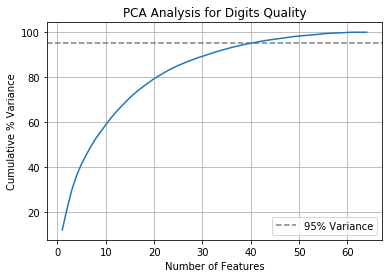

Digits Quality total features: 64
Best Number of PCA Components: 40
Total Time: 0.008 seconds
PCA Reconstruction Error:  2.566011023416891e-30
--------------------------------------------------------------------------------
*  Digits ICA  *
--------------------------------------------------------------------------------


/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: 

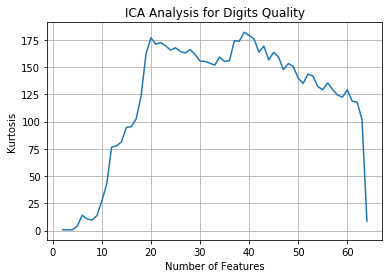

Total Number of Features: 64
Best Number of ICA Components: 39
Total Time: 11.121 seconds
ICA Reconstruction Error:  0.059863668637683824
--------------------------------------------------------------------------------
*  Digits RP  *
--------------------------------------------------------------------------------


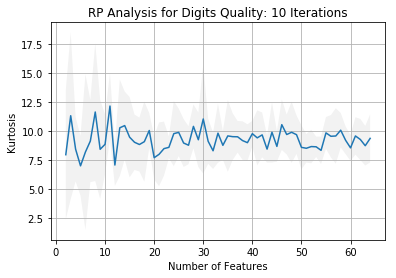

Total Number of Features: 64
Best Number of RP Components: 11
Total Time: 0.882 seconds


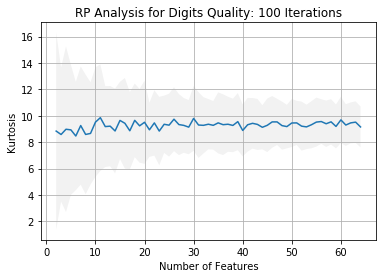

Total Number of Features: 64
Best Number of RP Components: 11
Total Time: 8.819 seconds
ICA Reconstruction Error:  0.803200635593496
--------------------------------------------------------------------------------
*  Digits UFS  *
--------------------------------------------------------------------------------


/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


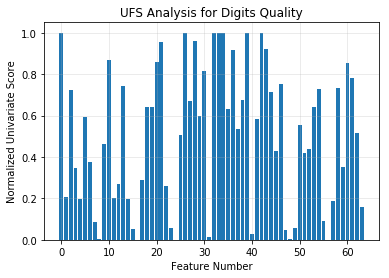

Total Time: 0.238 seconds


In [14]:
#
# PCA
#
print_line('Digits PCA')
digits_pca_components = calc_pca_components(digitsX_scaled, 'Digits Quality')
digitsPCA = PCA(n_components=digits_pca_components, random_state=0).fit(digitsX_scaled)
digits_pca_sse = reconstruction_error(digitsPCA, digitsX_scaled)
print('PCA Reconstruction Error: ', digits_pca_sse)



#
# ICA
#
print_line('Digits ICA')
digits_ica_components = calc_ica_components(digitsX_scaled, 'Digits Quality')
digitsICA = FastICA(n_components=digits_ica_components, random_state=0).fit(digitsX_scaled)
digits_ica_sse = reconstruction_error(digitsICA, digitsX_scaled)
print('ICA Reconstruction Error: ', digits_ica_sse)


#
# RP
#
print_line('Digits RP')
digits_rp_components = calc_rp_components(digitsX_scaled, 'Digits Quality', 10)
digits_rp_components = calc_rp_components(digitsX_scaled, 'Digits Quality', 100)
digitsRP = RP(n_components=digits_rp_components, random_state=0).fit(digitsX_scaled)
digits_rp_sse = reconstruction_error(digitsRP, digitsX_scaled)
print('ICA Reconstruction Error: ', digits_rp_sse)


#
# UFS
#
print_line('Digits UFS')
calc_kbest(digitsX_scaled, digitsy, 'Digits Quality')

# Clustering + Dimensionality Reduction
2 datasets, 4 dimensionality reductions, 2 algorithms (16 problems)

- Did you get the same clusters as before? Why or why not?

## Helper Functions

In [15]:
# Run all kmeans and plot results
def compare_kmeans(dataName, datasets):
    # Loop through all datasets
    all_sse = []
    all_scores = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        sse    = []
        scores = []
        
        # try different cluster sizes
        for i in range(2,15):
            kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
            kmeans.fit(data)
            sse.append(kmeans.inertia_)
            
            kmeans_labels = kmeans.predict(data)
            scores.append(sil_score(data, kmeans_labels))
            
        all_sse.append(sse)
        all_scores.append(scores)
        all_methods.append(d[0])
                    
    # Plot the data
    title = "K-means of " + dataName + " Using Dimensionality Reduction"
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(211)
    for i,sse in enumerate(all_sse):
        plt.plot(range(2,15), sse, lines[i], label=all_methods[i])
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.legend()
    plt.grid()
    
    plt.subplot(212)
    for i, score in enumerate(all_scores):
        plt.plot(range(2,15), score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()
    
def compare_em(dataName, datasets):
    # Loop through all datasets
    all_aic     = []
    all_bic     = []
    all_scores  = []
    all_dims    = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        dimensions = data.shape[1] + 1
        all_dims.append(list(range(2,dimensions)))
        
        aic    = []
        bic    = []
        scores = []
        
        for i in range(2,dimensions):
            gmm = GaussianMixture(n_components=i, random_state=0)
            gmm.fit(data)
            aic.append(gmm.aic(data))
            bic.append(gmm.bic(data))
        
            gmm_labels = gmm.predict(data)
            scores.append(sil_score(data, gmm_labels))
        
        all_aic.append(aic)
        all_bic.append(bic)
        all_scores.append(scores)
        all_methods.append(d[0])
    
    # Plot the data
    title = "EM of " + dataName + " Using Dimensionality Reduction"
    fig = plt.figure(figsize=(10, 8))
    
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(311)
    for i,aic in enumerate(all_aic):
        plt.plot(all_dims[i], aic, lines[i], label=all_methods[i])
    plt.title("AIC vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('AIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplot(312)
    for i,bic in enumerate(all_bic):
        plt.plot(all_dims[i], bic, lines[i], label=all_methods[i])
    plt.title("BIC Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    plt.subplot(313)
    for i,score in enumerate(all_scores):
        plt.plot(all_dims[i], score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
# Testers
#compare_kmeans('Wine Quality', wine_data)
#compare_kmeans('Digits', digits_data)
#compare_em('Wine Quality', wine_data)
#compare_em('Digits', digits_data)


# code based on example found at:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
def bench_kmeans(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_, metric='euclidean')))
   
def bench_em(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    gmm_labels = estimator.predict(data)
    print('%-9s\t%.2fs\t%i\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.aic(data), estimator.bic(data),
             metrics.homogeneity_score(labels, gmm_labels),
             metrics.completeness_score(labels, gmm_labels),
             metrics.v_measure_score(labels, gmm_labels),
             metrics.adjusted_rand_score(labels, gmm_labels),
             metrics.adjusted_mutual_info_score(labels,  gmm_labels),
             metrics.silhouette_score(data, gmm_labels, metric='euclidean')))
    
# Testers
#bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="Original",  data=wineX_scaled)
#bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="Original", data=wineX_scaled)

## Wine
### Data Reduction
Perform dimensionality reduction based on the results found in the previous section

In [16]:
# reduce wine data set
winePCA = PCA(n_components=9, random_state=0).fit_transform(wineX_scaled)
wineICA = FastICA(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineRP  = RP(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineUFS = SelectKBest(f_classif, k=4).fit_transform(wineX_scaled, winey)

wine_data = []
wine_data.append(['Original', wineX_scaled])
wine_data.append(['PCA', winePCA])
wine_data.append(['ICA', wineICA])
wine_data.append(['RP',  wineRP])
wine_data.append(['UFS', wineUFS])

# reduce digits dataset

# delete columns with no unique information
digitsPCA = PCA(n_components=40, random_state=0).fit_transform(digitsX_scaled)
digitsICA = FastICA(n_components=39, random_state=0).fit_transform(digitsX_scaled)
digitsRP  = RP(n_components=15, random_state=0).fit_transform(digitsX_scaled)

# delete columns with no unique information
trimmed_digitsX_scaled = digitsX_scaled[:, ~np.all(digitsX_scaled[1:] == digitsX_scaled[:-1], axis=0)]
digitsUFS = SelectKBest(f_classif, k=12).fit_transform(trimmed_digitsX_scaled, digitsy)

digits_data = []
digits_data.append(['Original', digitsX_scaled])
digits_data.append(['PCA', digitsPCA])
digits_data.append(['ICA', digitsICA])
digits_data.append(['RP',  digitsRP])
digits_data.append(['UFS', digitsUFS])

### K-means

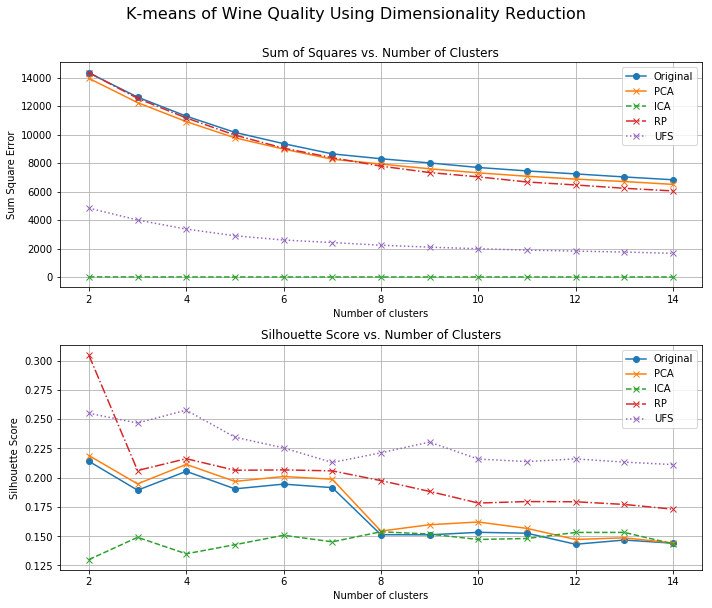

--------------------------------------------------------------------------------
*  K-Means Wine Benchmark  *
--------------------------------------------------------------------------------
init		time	inertia	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.05s	14330	0.025	0.025	0.025	0.027	0.025	0.207
PCA-based	0.04s	13945	0.029	0.031	0.030	0.030	0.030	0.219
ICA-based	0.06s	7	0.088	0.092	0.090	0.099	0.089	0.141
RP-based 	0.03s	14349	0.002	0.002	0.002	0.000	0.002	0.305
UFS-based	0.03s	4835	0.147	0.149	0.148	0.178	0.147	0.255


In [17]:
# Create k-means plots
compare_kmeans('Wine Quality', wine_data)

# Create k-means benchmark table
print_line('K-Means Wine Benchmark')
print('init\t\ttime\tinertia\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="Original",  data=wineX_scaled)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="PCA-based", data=winePCA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="ICA-based", data=wineICA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="RP-based",  data=wineRP)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="UFS-based", data=wineUFS)


### Expectation Maximization

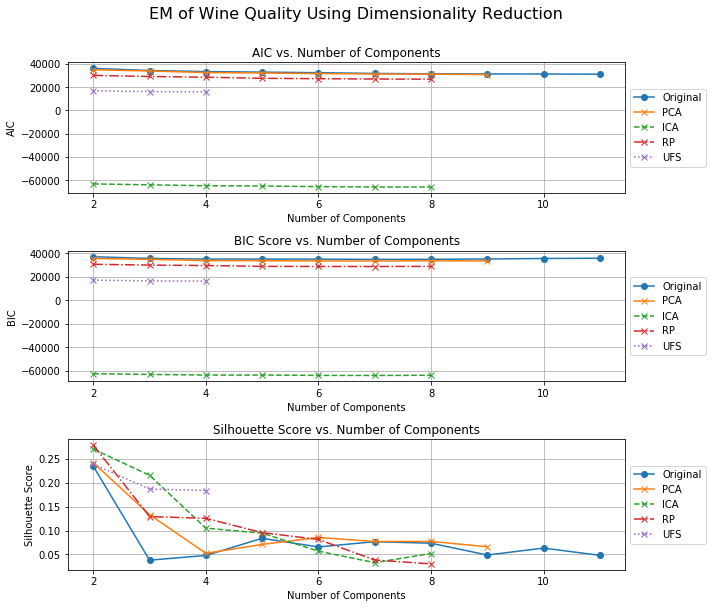

--------------------------------------------------------------------------------
*  EM Wine Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.17s	31421	34771	0.121	0.044	0.065	0.058	0.063	0.073
PCA-based	0.07s	31095	33456	0.132	0.049	0.072	0.065	0.070	0.077
ICA-based	0.11s	-65805	-63875	0.124	0.046	0.067	0.057	0.065	0.052
RP-based 	0.08s	26806	28736	0.138	0.052	0.076	0.057	0.074	0.030
UFS-based	0.08s	15460	16100	0.200	0.071	0.105	0.076	0.104	0.104


In [18]:
# Create k-means plots
compare_em('Wine Quality', wine_data)

# Create k-means benchmark table
print_line('EM Wine Benchmark')
print('init\t\ttime\taic\tbic\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="Original",  data=wineX_scaled)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="PCA-based", data=winePCA)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="ICA-based", data=wineICA)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="RP-based",  data=wineRP)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="UFS-based", data=wineUFS)

## Digits
### K-means

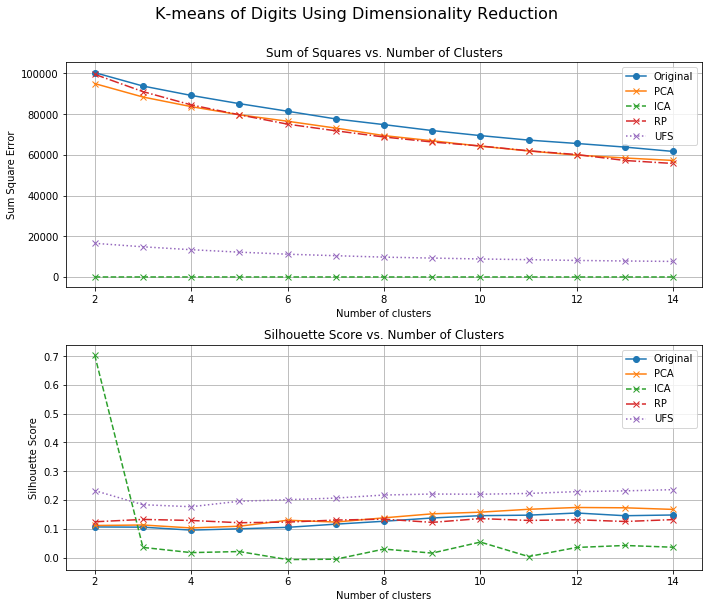

--------------------------------------------------------------------------------
*  K-Means Digits Benchmark  *
--------------------------------------------------------------------------------
init		time	inertia	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.18s	69664	0.671	0.712	0.691	0.558	0.688	0.145
PCA-based	0.16s	64058	0.604	0.652	0.627	0.467	0.623	0.161
ICA-based	0.19s	31	0.552	0.665	0.603	0.419	0.599	0.018
RP-based 	0.16s	63980	0.388	0.417	0.402	0.297	0.396	0.122
UFS-based	0.12s	8889	0.713	0.716	0.714	0.672	0.711	0.217


In [19]:
# Create plots
compare_kmeans('Digits', digits_data)

# Create benchmark table
print_line('K-Means Digits Benchmark')
print('init\t\ttime\tinertia\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="Original",  data=digitsX_scaled)
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="PCA-based", data=digitsPCA)
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="ICA-based", data=digitsICA)
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="RP-based",  data=digitsRP)
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="UFS-based", data=digitsUFS)


### Expectation Maximization

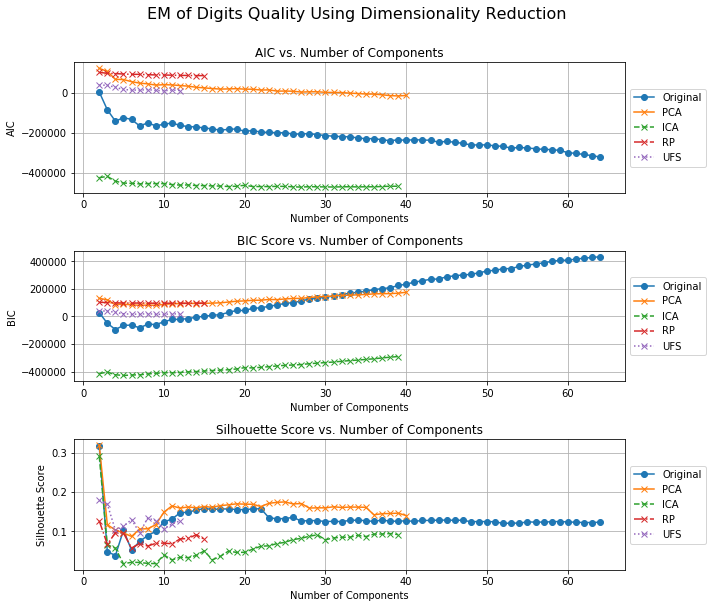

--------------------------------------------------------------------------------
*  EM Digits Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.94s	-237537	233831	0.879	0.590	0.706	0.425	0.696	0.127
PCA-based	0.33s	-13549	175653	0.859	0.585	0.696	0.426	0.685	0.140
ICA-based	0.43s	-467138	-286945	0.821	0.560	0.666	0.411	0.654	0.094
RP-based 	0.72s	80484	110365	0.687	0.463	0.553	0.303	0.537	0.086
UFS-based	0.74s	-1165	18826	0.698	0.500	0.583	0.345	0.565	0.015


In [20]:
# Create k-means plots
compare_em('Digits Quality', digits_data)

# Create k-means benchmark table
print_line('EM Digits Benchmark')
print('init\t\ttime\taic\tbic\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="Original",  data=digitsX_scaled)
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="PCA-based", data=digitsPCA)
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="ICA-based", data=digitsICA)
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="RP-based",  data=digitsRP)
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="UFS-based", data=digitsUFS)

## Report Notes
### Wine

### Digits

# NN with Dimensionality Reduction
Apply the dimensionality reduction algorithms to one of your datasets from assignment 1 (already done above (one wine set)) and rerun your neural network learner on the newly projected data.

## Helper Functions

In [41]:
# Function based on:
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
def plot_learning_curve(clf, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
                                                        clf, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 20),
                                                        return_times = True,
                                                        random_state = 0)

    # ------------------------------------------------------------------------------------------
    # Plot Learning Curve
    # ------------------------------------------------------------------------------------------
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.figure(1)
    plt.plot(train_sizes, train_mean, '--', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Create learning curve plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    # ------------------------------------------------------------------------------------------
    # Plot Scalability Curve
    # ------------------------------------------------------------------------------------------
    # Create mean and std of training times
    train_times_mean = np.mean(fit_times, axis=1)
    train_times_std  = np.std(fit_times, axis=1)
    
    # plot lines
    plt.figure(2)
    plt.plot(train_sizes, train_times_mean, 'o-')
    plt.fill_between(train_sizes, train_times_mean - train_times_std, train_times_mean + train_times_std, color='#DDDDDD')
    plt.title('Training Scalability')
    plt.xlabel('Training Set Size')
    plt.ylabel('Fit Times (s)')
    plt.grid()
    plt.show()
    
# Function based on:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion(clf, X_test, y_test, labels):
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        #print(title)
        #print(disp.confusion_matrix)
        plt.show()

    plt.show()
    
    return 0

## Reduced Data

In [42]:
# split into train and test sets

# reduce wine data set
winePCA = PCA(n_components=9, random_state=0).fit_transform(wineX_scaled)
wineICA = FastICA(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineRP  = RP(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineUFS = SelectKBest(f_classif, k=4).fit_transform(wineX_scaled, winey)

wine_data = []
wine_data.append(['Original', wineX_scaled])
wine_data.append(['PCA', winePCA])
wine_data.append(['ICA', wineICA])
wine_data.append(['RP',  wineRP])
wine_data.append(['UFS', wineUFS])


## Neural Net Training

--------------------------------------------------------------------------------
*  Original  *
--------------------------------------------------------------------------------


/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 62.482 s
Best Score: 0.771 using {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}


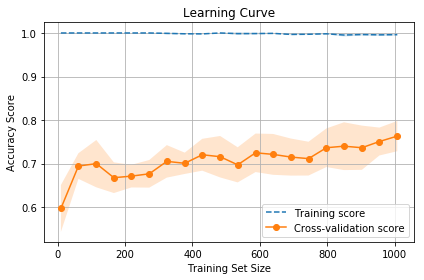

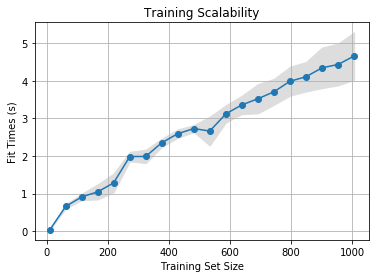

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       226
           1       0.75      0.78      0.77       254

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


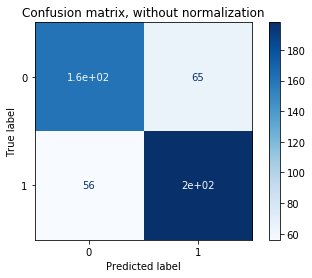

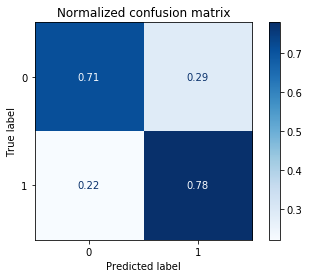

--------------------------------------------------------------------------------
*  PCA  *
--------------------------------------------------------------------------------
Neural Net model fit in 57.009 s
Best Score: 0.773 using {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}


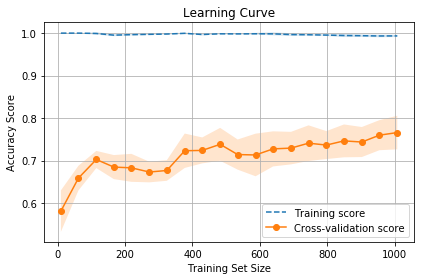

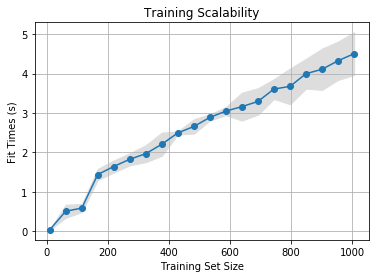

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       226
           1       0.73      0.77      0.75       254

    accuracy                           0.73       480
   macro avg       0.73      0.72      0.72       480
weighted avg       0.73      0.73      0.73       480



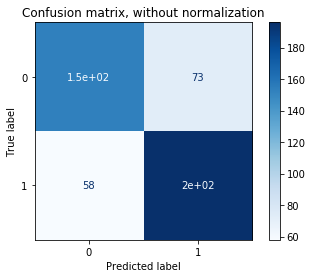

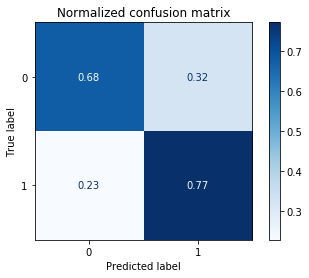

--------------------------------------------------------------------------------
*  ICA  *
--------------------------------------------------------------------------------


/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 56.551 s
Best Score: 0.767 using {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}


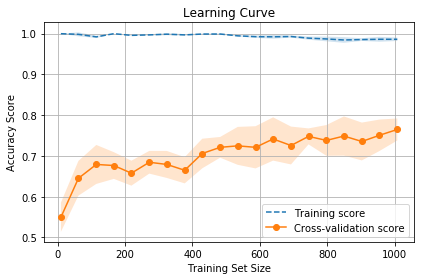

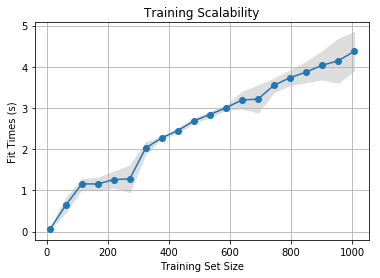

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       226
           1       0.72      0.76      0.74       254

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


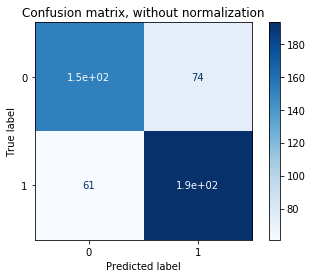

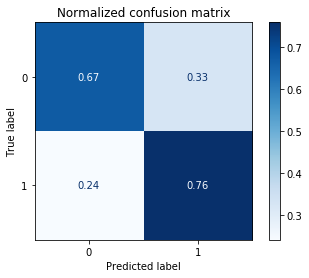

--------------------------------------------------------------------------------
*  RP  *
--------------------------------------------------------------------------------


/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 60.198 s
Best Score: 0.770 using {'hidden_layer_sizes': (40, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}


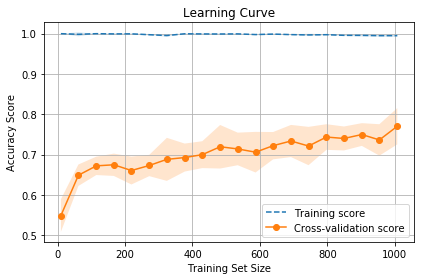

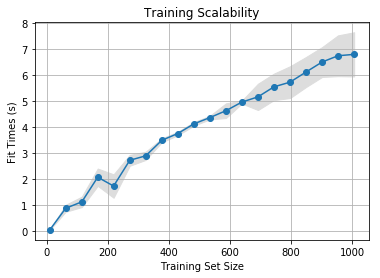

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       226
           1       0.71      0.77      0.74       254

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480



/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


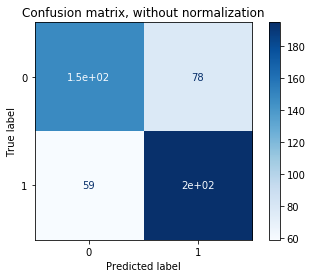

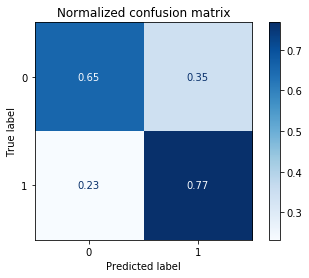

--------------------------------------------------------------------------------
*  UFS  *
--------------------------------------------------------------------------------
Neural Net model fit in 46.574 s
Best Score: 0.758 using {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}


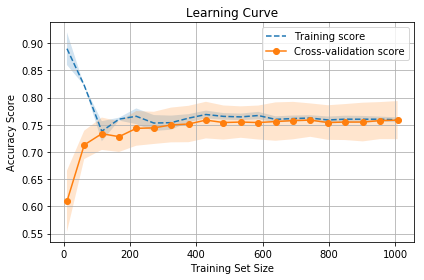

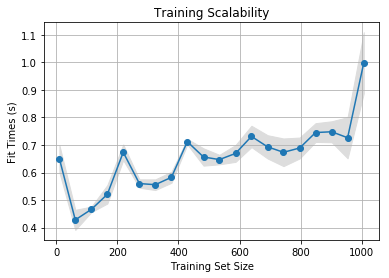

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       226
           1       0.74      0.76      0.75       254

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



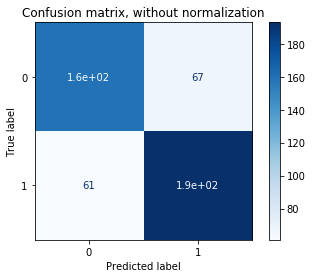

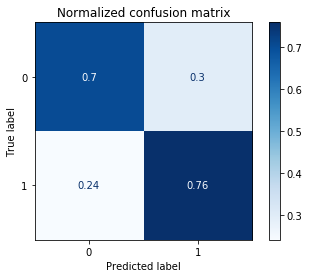

Results
Data:  Original
	Time:    62.481574058532715
	Score:   0.7712435649935651
	Params:  {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Data:  PCA
	Time:    57.00943446159363
	Score:   0.7730614543114542
	Params:  {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Data:  ICA
	Time:    56.550678968429565
	Score:   0.7667792792792794
	Params:  {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Data:  RP
	Time:    60.19764757156372
	Score:   0.7703265765765767
	Params:  {'hidden_layer_sizes': (40, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Data:  UFS
	Time:    46.57386350631714
	Score:   0.7577863577863577
	Params:  {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}


In [45]:
# Define Grid Search parameters
learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# define size of test set
test_size=0.3

# collect all results
nn_data = []

for d in wine_data:
    dataName = d[0]
    print_line(dataName)
    
    X = d[1]
    y = winey
    
    # Scale the data
    X = scale(X)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    clf = GridSearchCV(MLPClassifier(max_iter=2000, alpha=1, random_state=0),
                       parameters,
                       cv=10,
                       scoring='accuracy',
                       n_jobs=-1)
                
    t0 = time()
    clf.fit(X_train, y_train)
    nn_time = time() - t0
    
    print("Neural Net model fit in %.3f s" % nn_time)
    print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))
    
    # Create NN with best parameters from grid search
    nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                       solver=clf.best_params_["solver"],
                       hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                       max_iter=2000,
                       alpha=1,
                       random_state=0)
    
    # plot the learning curve for the data
    plot_learning_curve(nn, X_train, y_train)

    # Predict results using the test set
    nn.fit(X_train, y_train)
    nn_pred = nn.predict(X_test)
    
    # Calculate Null Accuracy
    calculate_null_accuracy(y)
    
    # let's see how our model performed
    print(classification_report(y_test, nn_pred))
    
    plot_confusion(nn, X_test, y_test, labels)
    
    
    # Collect results
    results = {
        "classifier": nn,
        "dataset": dataName,
        "time":    nn_time,
        "score":   clf.best_score_,
        "params":  clf.best_params_
    }
    
    nn_data.append(results)

print('Results')
for res in nn_data:
    print('Data: ',     res["dataset"])
    print('\tTime:   ', res["time"])
    print('\tScore:  ', res["score"])
    print('\tParams: ', res["params"])

## Report Notes
### Wine

- Any differences in performance?
    - All of the different datasets performed pretty much the same, with the UFS score coming in marginally lower
- Any differences in speed?
    - The UFS dataset took about 75% of the time. There was probably not much improvement for the others since the amount of features used was close to the original amount of features 8 or 9 out of 11. UFS on the other hand was only using 4 and almost had the same performance. This could be an indicator that it would be able to perform about equally with less data, thus being more generic and less prone to overfitting.
- Any other differences?

### Digits

# NN with Dimensionality Reduction and Clustering Applied to Dataset
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms, treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. 

Clustering -> neural network

Rerun your neural network learner on the newly projected data.
- Any differences in performance?
- Any differences in speed?
- Any other differences?

## K-means

In [ ]:
# create dataset

# cluster data and predict labels
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0)
kmeans.fit(wineX_scaled)
kmeans_labels = kmeans.predict(wineX_scaled)

# add in cluster labels as additional feature
kmeans_wineX = np.c_[wineX_scaled, kmeans_labels]

X = kmeans_wineX
y = winey

Neural Net model fit in 47.067 s
Best Score: 0.758 using {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}


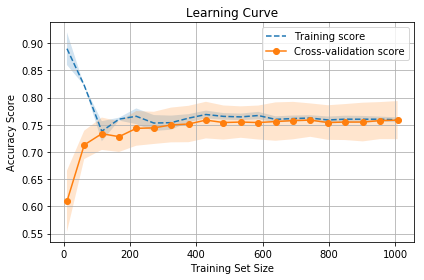

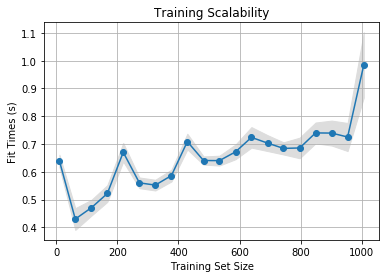

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       226
           1       0.74      0.76      0.75       254

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



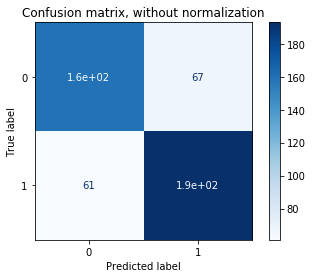

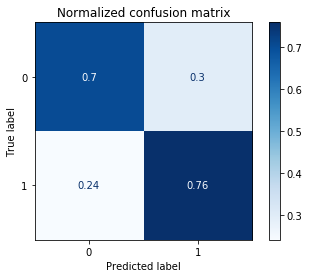

0

In [78]:
# Train Neural net

learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = GridSearchCV(MLPClassifier(max_iter=2000, alpha=1, random_state=0),
                   parameters,
                   cv=10,
                   scoring='accuracy',
                   n_jobs=-1)
            
t0 = time()
clf.fit(X_train, y_train)
nn_time = time() - t0

print("Neural Net model fit in %.3f s" % nn_time)
print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))

# Create NN with best parameters from grid search
nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                   solver=clf.best_params_["solver"],
                   hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                   max_iter=2000,
                   alpha=1,
                   random_state=0)

# plot the learning curve for the data
plot_learning_curve(nn, X_train, y_train)

# Predict results using the test set
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# let's see how our model performed
print(classification_report(y_test, nn_pred))

plot_confusion(nn, X_test, y_test, labels)

## Expectation Maximization

In [86]:
# create dataset

# cluster data and predict labels
em = GaussianMixture(n_components=2, random_state=0)
em.fit(wineX_scaled)
em_labels = em.predict(wineX_scaled)

# add in cluster labels as additional feature
em_wineX = np.c_[wineX_scaled, em_labels]

X = em_wineX
y = winey

/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 62.069 s
Best Score: 0.769 using {'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


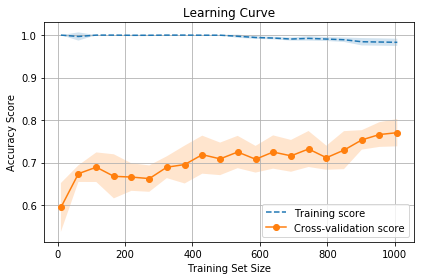

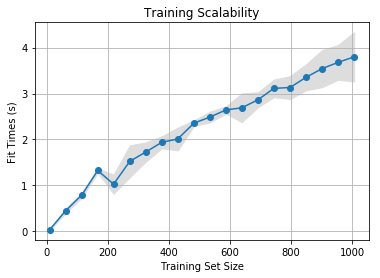

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       226
           1       0.74      0.76      0.75       254

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


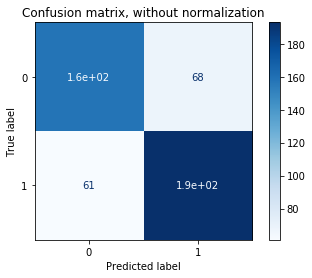

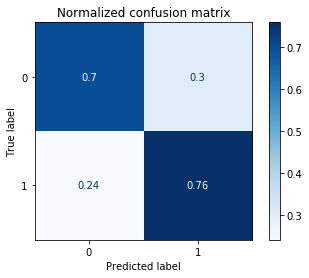

0

In [87]:
# Train Neural net

learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = GridSearchCV(MLPClassifier(max_iter=2000, alpha=1, random_state=0),
                   parameters,
                   cv=10,
                   scoring='accuracy',
                   n_jobs=-1)
            
t0 = time()
clf.fit(X_train, y_train)
nn_time = time() - t0

print("Neural Net model fit in %.3f s" % nn_time)
print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))

# Create NN with best parameters from grid search
nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                   solver=clf.best_params_["solver"],
                   hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                   max_iter=2000,
                   alpha=1,
                   random_state=0)

# plot the learning curve for the data
plot_learning_curve(nn, X_train, y_train)

# Predict results using the test set
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# let's see how our model performed
print(classification_report(y_test, nn_pred))

plot_confusion(nn, X_test, y_test, labels)

## Report Notes
### Wine

### Digits


# General Notes
- Explanation of your methods
- How are these algorithms the same as, different from, and interact with your earlier work
- Clusters
    - A description of the clusters that you got
    - Why did you get the clusters you did
    - Do they make “sense”? See isbell paper
    - If you used data that already had labels (For example data from a classification problem from assignment #1) did the clusters line up with the labels?
    - Do they otherwise line up naturally?
    - Why or why not?
    - Compare and contrast the different algorithms?
    - What sort of changes might you make to each of those algorithms to improve performance?
    - How much performance was due to the problems you chose?
    - Justify your analysis with data explicitly
- It might be difficult to generate the same kinds of graphs for the part of the assignment. Come up with some way to describe the kinds of clusters you get. If you can do it visually, all the better.
















































